In [1]:
# importing packages
import pandas as pd
import glob,os
  
folder_path = './Thesis'
file_list = glob.glob(folder_path + "/*.tmap")
main_dataframe = pd.DataFrame([])

for i in file_list:
    data = pd.read_csv(i,delimiter='\t')
    data['Run'] = os.path.basename(i).split('.')[0]
    df = pd.DataFrame(data)
    main_dataframe = pd.concat([main_dataframe,df],axis=0)
main_dataframe['Ensemble'] = main_dataframe['ref_id'].str[:15]
main_dataframe

,ref_gene_id,ref_id,class_code,qry_gene_id,qry_id,num_exons,FPKM,TPM,cov,len,major_iso_id,ref_match_len,Run,Ensemble
0,-,-,u,STRG.17324,STRG.17324.1,3,12.008000,24.625532,28.425085,262,STRG.17324.2,-,SRR8758292,-
1,-,-,u,STRG.17324,STRG.17324.2,3,7.810334,16.017122,18.488457,552,STRG.17324.2,-,SRR8758292,-
2,-,-,u,STRG.17325,STRG.17325.1,1,4.649572,9.535159,11.006370,7501,STRG.17325.1,-,SRR8758292,-
3,-,-,u,STRG.17325,STRG.17325.2,2,1.391413,2.853454,3.293723,1527,STRG.17325.1,-,SRR8758292,-
4,-,-,u,STRG.17325,STRG.17325.3,3,0.921036,1.888825,2.180258,1673,STRG.17325.1,-,SRR8758292,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26660,ENSG00000291033.1,ENST00000253320.8,c,STRG.17427,STRG.17427.1,3,0.918611,1.415534,1.753968,504,STRG.17427.1,7299,SRR8758297,ENST00000253320
26661,ENSG00000012817.16,ENST00000382806.6,c,STRG.17428,STRG.17428.1,9,3.890052,5.994379,7.427547,2650,STRG.17428.1,5134,SRR8758297,ENST00000382806
26662,ENSG00000012817.16,ENST00000382806.6,c,STRG.17429,STRG.17429.1,9,1.840580,2.836243,3.514347,1394,STRG.17429.1,5134,SRR8758297,ENST00000382806
26663,ENSG00000012817.16,ENST00000317961.9,c,STRG.17430,STRG.17430.1,6,1.216567,1.874670,2.322876,765,STRG.17430.1,6825,SRR8758297,ENST00000317961


In [2]:
df4=main_dataframe[['Ensemble']]
df4

,Ensemble
0,-
1,-
2,-
3,-
4,-
...,...
26660,ENST00000253320
26661,ENST00000382806
26662,ENST00000382806
26663,ENST00000317961


In [3]:
df4.to_csv('./Thesis/transcript_id.txt',index=False)

In [4]:
tname = pd.read_csv('./Thesis/transcript_id_gffcompare.txt',delimiter='\t')
tname

,Transcript stable ID,Gene name,Transcript name
0,ENST00000389680,MT-RNR1,MT-RNR1-201
1,ENST00000387347,MT-RNR2,MT-RNR2-201
2,ENST00000387365,MT-TI,MT-TI-201
3,ENST00000361453,MT-ND2,MT-ND2-201
4,ENST00000361624,MT-CO1,MT-CO1-201
...,...,...,...
45183,ENST00000697277,SPATA1,SPATA1-208
45184,ENST00000700444,CAMTA1,CAMTA1-229
45185,ENST00000700422,CAMTA1,CAMTA1-225
45186,ENST00000702695,PROX1-AS1,PROX1-AS1-250


In [5]:
main_dataframe.rename(columns = {'Ensemble':'Transcript stable ID'}, inplace = True)
final = pd.merge(main_dataframe, tname, on=['Transcript stable ID'],how='left')
final = final[['Transcript stable ID','Gene name', 'Transcript name', 'class_code','qry_gene_id','qry_id','Run']]
final

,Transcript stable ID,Gene name,Transcript name,class_code,qry_gene_id,qry_id,Run
0,-,NaN,NaN,u,STRG.17324,STRG.17324.1,SRR8758292
1,-,NaN,NaN,u,STRG.17324,STRG.17324.2,SRR8758292
2,-,NaN,NaN,u,STRG.17325,STRG.17325.1,SRR8758292
3,-,NaN,NaN,u,STRG.17325,STRG.17325.2,SRR8758292
4,-,NaN,NaN,u,STRG.17325,STRG.17325.3,SRR8758292
...,...,...,...,...,...,...,...
166896,ENST00000253320,TXLNGY,TXLNGY-202,c,STRG.17427,STRG.17427.1,SRR8758297
166897,ENST00000382806,KDM5D,KDM5D-202,c,STRG.17428,STRG.17428.1,SRR8758297
166898,ENST00000382806,KDM5D,KDM5D-202,c,STRG.17429,STRG.17429.1,SRR8758297
166899,ENST00000317961,KDM5D,KDM5D-201,c,STRG.17430,STRG.17430.1,SRR8758297


In [6]:
column_names = ['Chr', 'Start', 'End','Gene Stable ID version','Gene name','Strand','Type'] 
rna_types=pd.read_csv('./Thesis/types_rna.bed',delimiter='\t',header= None,names=column_names)
rna_types

,Chr,Start,End,Gene Stable ID version,Gene name,Strand,Type
0,chr1,11868,14409,ENSG00000290825.1,DDX11L2,+,lncRNA
1,chr1,12009,13670,ENSG00000223972.6,DDX11L1,+,transcribed_unprocessed_pseudogene
2,chr1,14403,29570,ENSG00000227232.5,WASH7P,-,unprocessed_pseudogene
3,chr1,17368,17436,ENSG00000278267.1,MIR6859-1,-,miRNA
4,chr1,29553,31109,ENSG00000243485.5,MIR1302-2HG,+,lncRNA
...,...,...,...,...,...,...,...
62698,chrM,14148,14673,ENSG00000198695.2,MT-ND6,-,protein_coding
62699,chrM,14673,14742,ENSG00000210194.1,MT-TE,-,Mt_tRNA
62700,chrM,14746,15887,ENSG00000198727.2,MT-CYB,+,protein_coding
62701,chrM,15887,15953,ENSG00000210195.2,MT-TT,+,Mt_tRNA


In [7]:
#join metadata
metadata=pd.read_table('./bed files/metadata.txt',delimiter=',')
df=pd.merge(final, metadata[["Run", "Genotype"]], on="Run")
df.to_csv('./Thesis/GFFcompare_output.csv', sep=',',index=False)
df

,Transcript stable ID,Gene name,Transcript name,class_code,qry_gene_id,qry_id,Run,Genotype
0,-,NaN,NaN,u,STRG.17324,STRG.17324.1,SRR8758292,FOXO1A3 overexpression
1,-,NaN,NaN,u,STRG.17324,STRG.17324.2,SRR8758292,FOXO1A3 overexpression
2,-,NaN,NaN,u,STRG.17325,STRG.17325.1,SRR8758292,FOXO1A3 overexpression
3,-,NaN,NaN,u,STRG.17325,STRG.17325.2,SRR8758292,FOXO1A3 overexpression
4,-,NaN,NaN,u,STRG.17325,STRG.17325.3,SRR8758292,FOXO1A3 overexpression
...,...,...,...,...,...,...,...,...
166896,ENST00000253320,TXLNGY,TXLNGY-202,c,STRG.17427,STRG.17427.1,SRR8758297,control
166897,ENST00000382806,KDM5D,KDM5D-202,c,STRG.17428,STRG.17428.1,SRR8758297,control
166898,ENST00000382806,KDM5D,KDM5D-202,c,STRG.17429,STRG.17429.1,SRR8758297,control
166899,ENST00000317961,KDM5D,KDM5D-201,c,STRG.17430,STRG.17430.1,SRR8758297,control


In [8]:
df2=df.groupby(['Run','Genotype','class_code']).size().reset_index(name='counts')
df3=df2.groupby(['Run', 'Genotype','class_code']).agg({'counts': 'sum'})
df4=df3.groupby(level=0).apply(lambda x: 100*x/float(x.sum())).reset_index()
df5=df4.pivot(columns = 'class_code', index = ['Run','Genotype'], values = 'counts')
df6=df5.reset_index()
df7=df6.set_index('Genotype')
df2

,Run,Genotype,class_code,counts
0,SRR8758292,FOXO1A3 overexpression,=,11801
1,SRR8758292,FOXO1A3 overexpression,c,7278
2,SRR8758292,FOXO1A3 overexpression,e,13
3,SRR8758292,FOXO1A3 overexpression,i,194
4,SRR8758292,FOXO1A3 overexpression,j,7050
...,...,...,...,...
77,SRR8758297,control,p,9
78,SRR8758297,control,s,1
79,SRR8758297,control,u,119
80,SRR8758297,control,x,57


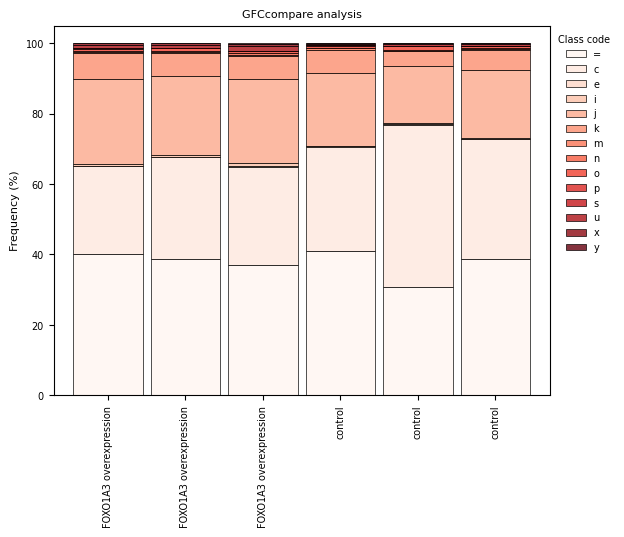

In [9]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# plot data in stack manner of bar type
df7.plot(kind='bar', stacked=True,colormap = plt.cm.Reds, alpha = 0.8,
                           width = 0.9, edgecolor = 'black', linewidth = 0.6, clip_on = True)

plt.legend(ncol = 1, title = 'Class code', title_fontsize = 7,
           loc = 0, bbox_to_anchor = (1, 1), frameon= False, fontsize = 7);
plt.title('GFCcompare analysis', fontsize = 8)
plt.ylabel('Frequency (%)', fontsize = 8);
plt.xlabel('')
plt.xticks(rotation = 90, fontsize = 7, ha="center"); plt.yticks(fontsize = 8);
plt.tick_params(axis = 'y', labelsize = 7)
plt.savefig('GFFcompare_ylabel_and_title8_xticks_and_tick_params7.png', format='png', dpi=600)
plt.show()


In [10]:
df4_filteredB = df2[ (df2['class_code'] != 'e') & (df2['class_code'] != 'n')& (df2['class_code'] != 's') &(df2['class_code'] != 'p')& (df2['class_code'] != 'y')& (df2['class_code'] != 'o')& (df2['class_code'] != 'u')& (df2['class_code'] != 'x')& (df2['class_code'] != 'm')& (df2['class_code'] != 'i')  ]
df4_filteredB
df4_filteredS = df2[ (df2['class_code'] != 'e') & (df2['class_code'] != 'n')& (df2['class_code'] != 's') &(df2['class_code'] != 'p')& (df2['class_code'] != 'y')& (df2['class_code'] != 'c')& (df2['class_code'] != '=')& (df2['class_code'] != 'j')& (df2['class_code'] != 'k')& (df2['class_code'] != 'u') ]
df4_filteredB

,Run,Genotype,class_code,counts
0,SRR8758292,FOXO1A3 overexpression,=,11801
1,SRR8758292,FOXO1A3 overexpression,c,7278
4,SRR8758292,FOXO1A3 overexpression,j,7050
5,SRR8758292,FOXO1A3 overexpression,k,2170
14,SRR8758293,FOXO1A3 overexpression,=,11045
15,SRR8758293,FOXO1A3 overexpression,c,8168
18,SRR8758293,FOXO1A3 overexpression,j,6397
19,SRR8758293,FOXO1A3 overexpression,k,1840
27,SRR8758294,FOXO1A3 overexpression,=,10975
28,SRR8758294,FOXO1A3 overexpression,c,8347


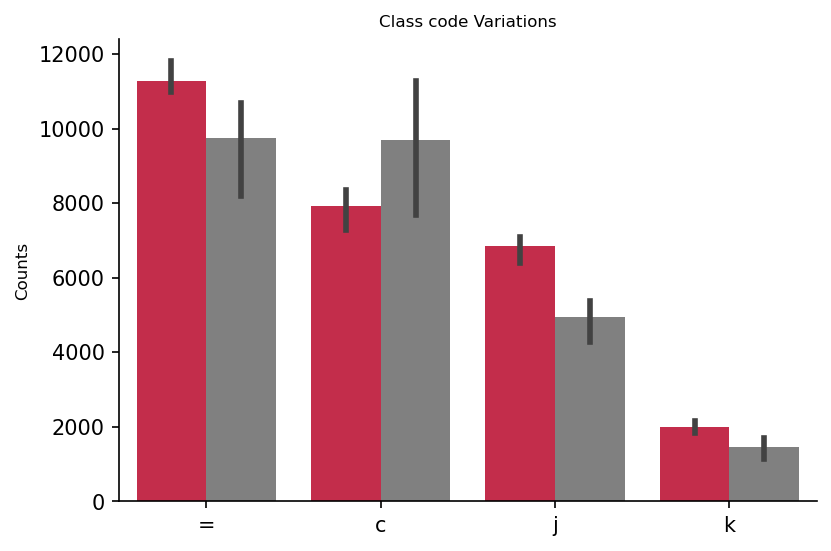

In [11]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (6,4), dpi = 150)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
colors = ['crimson','Grey']
sns.barplot(x = 'class_code', y = 'counts', hue = 'Genotype',data = df4_filteredB,palette=colors,ax = ax, linewidth = 0.5)
plt.ylabel('Counts', fontsize = 8);
plt.xlabel('')
plt.title('Class code Variations', fontsize = 8)
ax.legend([], [], frameon=False)

# Save and Show the plot
plt.savefig('GFFcompare_statistics_ylabel_and_title=8_legend=7.png',bbox_inches='tight', format='png', dpi=600)
plt.show()

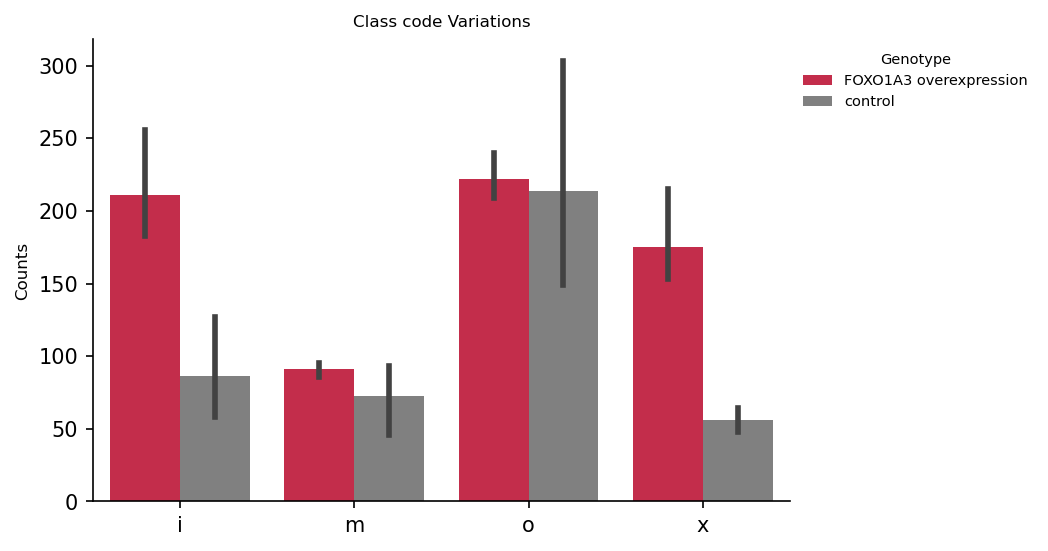

In [12]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (6,4), dpi = 150)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
colors = ['crimson','Grey']
sns.barplot(x = 'class_code', y = 'counts', hue = 'Genotype',data = df4_filteredS,palette=colors,ax = ax, linewidth = 0.8)
plt.ylabel('Counts', fontsize = 8);
plt.xlabel('')
plt.title('Class code Variations', fontsize = 8)
plt.legend(ncol = 1, title = 'Genotype', title_fontsize = 7,
           loc = 0, bbox_to_anchor = (1, 1), frameon= False, fontsize = 7)
# Show the plot
plt.savefig('GFFcompare_statistics2_ylabel_and_title=8_legend=7.png',bbox_inches='tight', format='png', dpi=600)
plt.show()

In [13]:
df_filtered_o=df2.loc[df2['Genotype'] =='FOXO1A3 overexpression']
df_filtered_c=df2.loc[df2['Genotype']=='control']
df_filtered_final_o=df_filtered_o.pivot(columns = 'class_code', index = ['Run','Genotype'], values = 'counts')
df_filtered_final_c=df_filtered_c.pivot(columns = 'class_code', index = ['Run','Genotype'], values = 'counts')
print(df_filtered_final_c)
print(df_filtered_final_o)

class_code                 =        c     e      i       j       k     m  \
Run        Genotype                                                        
SRR8758295 control   10685.0   7695.0  19.0   58.0  5385.0  1701.0  93.0   
SRR8758296 control    8188.0  12358.0  29.0  127.0  4276.0  1147.0  46.0   
SRR8758297 control   10361.0   9053.0  20.0   75.0  5155.0  1493.0  78.0   

class_code              n      o     p    s      u     x    y  
Run        Genotype                                            
SRR8758295 control   68.0  149.0   9.0  4.0   99.0  48.0  5.0  
SRR8758296 control   37.0  303.0  20.0  NaN  126.0  64.0  7.0  
SRR8758297 control   52.0  189.0   9.0  1.0  119.0  57.0  3.0  
class_code                               =       c     e      i       j  \
Run        Genotype                                                       
SRR8758292 FOXO1A3 overexpression  11801.0  7278.0  13.0  194.0  7050.0   
SRR8758293 FOXO1A3 overexpression  11045.0  8168.0  22.0  183.0  6397.0   

In [14]:
import scipy.stats as stats

In [15]:
group1 = [99, 126, 119]
group2 = [262,240,376]

# Perform a t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)
print(p_value)


0.014289027112185288


https://aakinshin.net/posts/python-mann-whitney-incorrect-p-value/

In [16]:
for i in df_filtered_final_o:
   a = df_filtered_final_o[i] #vai selecionar a tua coluna do df1
   b = df_filtered_final_c[i] # vai selecionar a coluna do df2 com o mesmo nome
   t_statistic, p_value = stats.ttest_ind(a, b)# vai fazer o teste
   print(i, p_value)
#ttest e effect size fazer!

= 0.13829235804559842
c 0.28139971229061295
e 0.8240417153297361
i 0.015603315115302082
j 0.009340031382904337
k 0.04240857304478278
m 0.24982270681659743
n 0.16788366164324295
o 0.8680552855347945
p 0.3486411394402042
s nan
u 0.014289027112185288
x 0.004317549567162057
y 0.10128817895021609


In [17]:
def cohend(d1, d2):
    '''is the difference d1-d2 significantly larger?'''

    from numpy import mean, var, sqrt

    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    # calculate the effect size
    return (u1 - u2) / s

In [18]:
for i in df_filtered_final_o:
   a = df_filtered_final_o[i] #vai selecionar a tua coluna do df1
   b = df_filtered_final_c[i] # vai selecionar a coluna do df2 com o mesmo nome
   print(i,cohend(a,b))

= 1.5089738761220746
c -1.0157707404077763
e -0.19380063324460406
i 3.298689831827322
j 3.8338007092210185
k 2.400124100496672
m 1.0981863972154058
n 1.3732514413531987
o 0.14457994185900416
p -0.8660254037844385
s -0.6324555320336759
u 3.386434334779029
x 4.7587311741744465
y 1.7313584026611093


In [19]:
final.to_csv('./Thesis/classification.csv',sep=',',index=False)

In [20]:
import statistics
df_final = df[ (df['class_code'] != 'u')]
#dataframe control
df_final_c= df_final[ (df_final['Genotype'] == 'control')]
df_final_c=df_final_c.groupby(['Gene name','class_code','Transcript name']).size().reset_index(name='counts')
df_final_c= df_final_c[df_final_c['counts'] >= 3]
df_final_c=df_final_c.groupby(['Gene name','Transcript name','class_code']).size().reset_index(name='counts')
df_final_c=df_final_c.groupby(['Gene name','Transcript name'])['class_code'].apply(statistics.mode).to_frame()
df_final_c=df_final_c.reset_index()
df_final_c = df_final_c[ (df_final_c['class_code'] != 'e') & (df_final_c['class_code'] != 'n')& (df_final_c['class_code'] != 's') &(df_final_c['class_code'] != 'p')& (df_final_c['class_code'] != 'y')& (df_final_c['class_code'] != 'o') & (df_final_c['class_code'] != '=')& (df_final_c['class_code'] != 'm')& (df_final_c['class_code'] != 'c') ]
#dataframe overexpression
df_final_o= df_final[ (df_final['Genotype'] == 'FOXO1A3 overexpression')]
df_final_o=df_final_o.groupby(['Gene name','class_code','Transcript name']).size().reset_index(name='counts')
df_final_o= df_final_o[df_final_o['counts'] >= 3]
df_final_o=df_final_o.groupby(['Gene name','Transcript name','class_code']).size().reset_index(name='counts')
df_final_o=df_final_o.groupby(['Gene name','Transcript name'])['class_code'].apply(statistics.mode).to_frame()
df_final_o=df_final_o.reset_index()
df_final_o = df_final_o[ (df_final_o['class_code'] != 'e') & (df_final_o['class_code'] != 'n')& (df_final_o['class_code'] != 's') &(df_final_o['class_code'] != 'p')& (df_final_o['class_code'] != 'y')& (df_final_o['class_code'] != 'o') & (df_final_o['class_code'] != '=')& (df_final_o['class_code'] != 'm')& (df_final_o['class_code'] != 'c') ]
df_final_c


,Gene name,Transcript name,class_code
9,AAMDC,AAMDC-211,j
44,ABCE1,ABCE1-202,k
60,ABI2,ABI2-222,k
62,ABI3,ABI3-203,k
63,ABI3BP,ABI3BP-206,j
...,...,...,...
9568,ZNF821,ZNF821-207,j
9585,ZRANB1,ZRANB1-201,j
9605,ZSWIM8,ZSWIM8-207,k
9610,ZXDC,ZXDC-202,j


In [21]:
merged_df = pd.merge(df_final_o, df_final_c, on='Transcript name',how='left')
merged_df
transcript=[]
for i in range(len(merged_df)):
    class_x=merged_df.iloc[i,2]
    class_y=merged_df.iloc[i,4]
    if class_x==class_y:
        transcript.append('remove')
    else:
        transcript.append('keep')
merged_df['Condition']=transcript
Rel_transcripts=merged_df.loc[merged_df['Condition'] == 'keep']
Rel_transcripts  = Rel_transcripts.iloc[: , :3]
Rel_transcripts.rename(columns = {'Gene name_x':'Gene name'}, inplace = True)
Rel_transcripts
Rel_transcripts.to_csv('./Thesis/rel_class_gffcompare.csv', sep=',',index=False)
Rel_transcripts

,Gene name,Transcript name,class_code_x
0,AADACL2-AS1,AADACL2-AS1-202,j
1,AAK1,AAK1-212,k
2,AAMDC,AAMDC-211,k
3,ABCA4,ABCA4-201,j
4,ABCA5,ABCA5-201,j
...,...,...,...
1944,ZSCAN25,ZSCAN25-204,j
1945,ZSWIM1,ZSWIM1-201,j
1947,ZSWIM9,ZSWIM9-203,j
1948,ZZEF1,ZZEF1-201,j


In [22]:
#Genes of GFFCompare
Genes_rel_trans=Rel_transcripts[['Gene name']]
Genes_rel_trans=Genes_rel_trans.drop_duplicates()
print(len(Rel_transcripts['Gene name'].unique()))
Genes_rel_trans

1310


,Gene name
0,AADACL2-AS1
1,AAK1
2,AAMDC
3,ABCA4
4,ABCA5
...,...
1944,ZSCAN25
1945,ZSWIM1
1947,ZSWIM9
1948,ZZEF1


In [29]:
#Genes of Vast-tools
Spliced_genes=pd.read_csv('./Thesis/Diff_spliced_VT_mr=30_genes.csv',sep=',')
Spliced_genes

,GENE,EVENT,SRR8758292_1,SRR8758295_1,E[dPsi],MV[dPsi]_at_0.95,Result,Type
0,CCDC80,HsaEX1007499,0.839559,0.522445,0.317115,0.14,True,Exon Skip
1,MKNK2,HsaEX0039398,0.631932,0.306703,0.325229,0.23,True,Exon Skip
2,ADGRG6,HsaEX0028280,0.583335,0.200682,0.382653,0.21,True,Exon Skip
3,HERC2,HsaEX1016718,0.486656,0.205643,0.281014,0.29,True,Exon Skip
4,CHEK1,HsaEX0015138,0.853999,0.985449,-0.131450,0.12,True,Exon Skip
...,...,...,...,...,...,...,...,...
101,TIA1,HsaINT0167039,0.140944,0.273284,-0.132341,0.16,True,Intron retention
102,TRIM41,HsaINT0172365,0.591247,0.772350,-0.181103,0.16,True,Intron retention
103,BAG6,HsaINT1005014,0.061024,0.171790,-0.110766,0.13,True,Intron retention
104,COA1,HsaINT1008030,0.700904,0.967158,-0.266254,0.11,True,Intron retention


In [24]:
#Genes of DEA of isoforms
dge=pd.read_csv('./Thesis/Transcript_dge.csv',sep=',')
dge

,Transcript stable ID,logFC,logCPM,F,PValue,FDR,ExpressionS,-log10_pvalue,-log10_FDR,Expression,Gene stable ID,Gene name,Transcript name
0,ENST00000642959,12.780077,4.125378,811.750860,2.167146e-07,0.009766,Up regulated,6.664112,2.010272,Changed,ENSG00000180488,MIGA1,MIGA1-204
1,ENST00000264839,7.039579,6.093198,512.347625,8.011904e-07,0.010995,Up regulated,6.096264,1.958821,Changed,ENSG00000079841,RIMS1,RIMS1-201
2,ENST00000324873,6.731188,4.275613,507.867282,8.213959e-07,0.010995,Up regulated,6.085447,1.958821,Changed,ENSG00000176046,NUPR1,NUPR1-201
3,ENST00000378501,11.699566,2.951921,472.861700,1.005704e-06,0.010995,Up regulated,5.997530,1.958821,Changed,ENSG00000101333,PLCB4,PLCB4-204
4,ENST00000381405,5.859298,9.717271,416.006941,1.445443e-06,0.010995,Up regulated,5.839999,1.958821,Changed,ENSG00000164283,ESM1,ESM1-202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,ENST00000549606,-2.213613,3.805707,27.620321,2.202970e-03,0.049943,Down regulated,2.656991,1.301529,Changed,ENSG00000135446,CDK4,CDK4-206
1456,ENST00000590120,-2.727012,0.290874,27.617946,2.203431e-03,0.049943,Down regulated,2.656901,1.301529,Changed,ENSG00000104903,LYL1,LYL1-202
1457,ENST00000221233,-2.810507,2.547509,27.614654,2.204070e-03,0.049943,Down regulated,2.656775,1.301529,Changed,ENSG00000077348,EXOSC5,EXOSC5-201
1458,ENST00000644510,2.649819,5.939862,28.839590,2.206484e-03,0.049957,Up regulated,2.656299,1.301402,Changed,ENSG00000136631,VPS45,VPS45-214


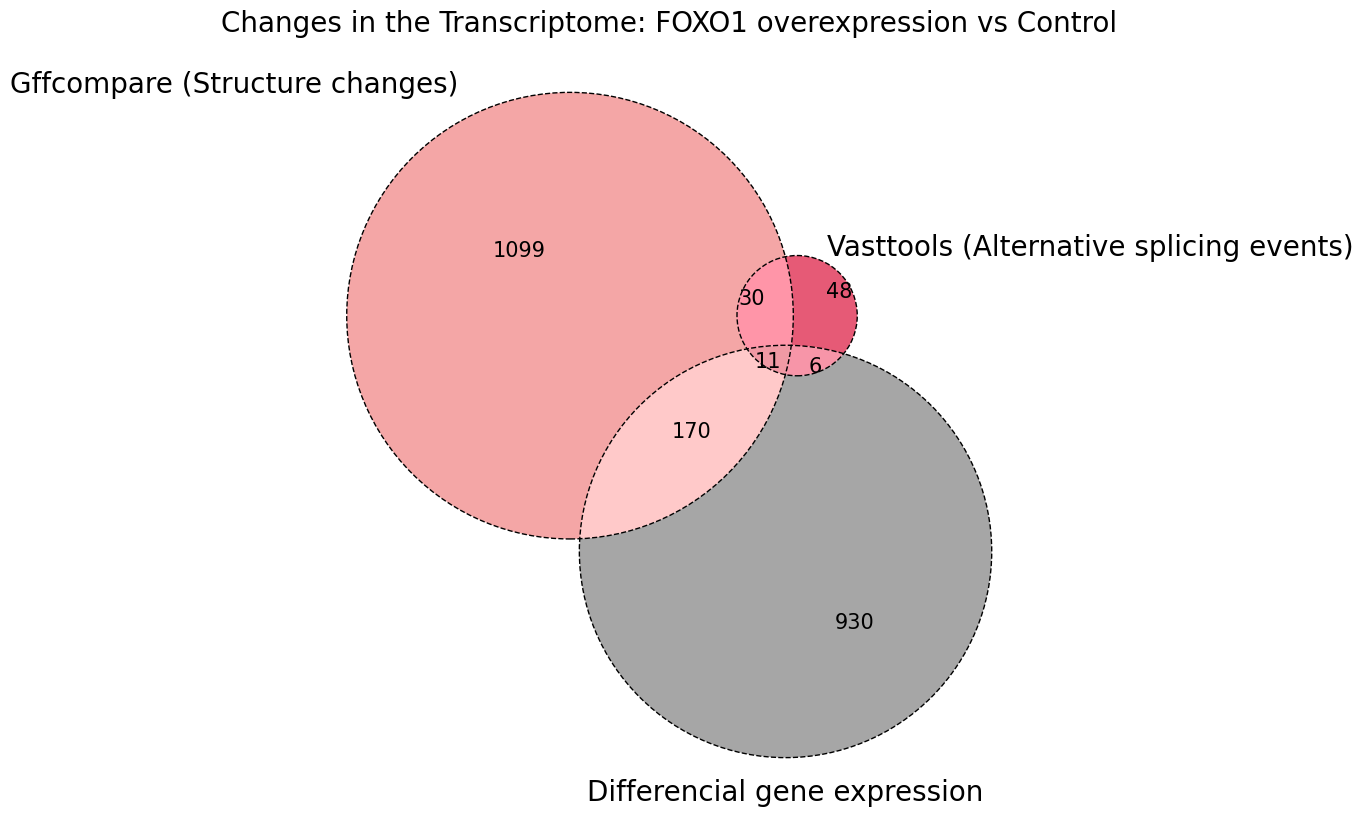

In [25]:
from matplotlib_venn import venn3,venn3_circles
from matplotlib import pyplot as plt
# setup the figure
fig, ax = plt.subplots(figsize = (12,10))
ax.set_title('Changes in the Transcriptome: FOXO1 overexpression vs Control', fontsize=20)
# make the venn diagram
v = venn3([set(Rel_transcripts['Gene name'].unique()), set(Spliced_genes['GENE'].unique()),set(dge['Gene name'].unique())],set_colors=("lightcoral","crimson",'grey'),alpha=0.7,
set_labels=['Gffcompare (Structure changes)', 'Vasttools (Alternative splicing events)','Differencial gene expression'])
# add circle outlines
c = venn3_circles([set(Rel_transcripts['Gene name'].unique()), set(Spliced_genes['GENE'].unique()),set(dge['Gene name'].unique())],linestyle="dashed", linewidth=1)
for text in v.set_labels:
   text.set_fontsize(20)

for text in v.subset_labels:
   text.set_fontsize(15)
fig.savefig('Venn_diagram_ax.set_title=20.png', format='png',bbox_inches='tight', dpi=600)